# Differing GRAE Results

In [1]:
from Helpers.grae_pipeline_helpers import read_all_graeBuild_results
import pandas as pd

2025-03-07 18:59:31.571168: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-07 18:59:31.612459: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-07 18:59:31.625194: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 18:59:31.650914: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-07 18:59:33.781497: W tensorflow/comp

In [2]:
grae_results = read_all_graeBuild_results()

#Sort out different grae results because their MSEs mean different things

- Alternate: MSE means how far off the alternate method (mainly matrix multiplication) is off from the actual data a or b when translated
- just_MSE: MSE measures how far GRAE methods are from the actual data when passed through like dataA to Z to dataB (and vice versa)
- All others: represent how far the GRAE method (Data a to Z) is off from the actual embedding points if there was no train / test split

In [3]:
#Sort out different grae results because their MSEs mean different things
MSE_to_Data = grae_results[grae_results['grae_build'] == "just_MSE"]
alternate = grae_results[grae_results['grae_build'] == "alternate"]
grae_results = grae_results[~grae_results['grae_build'].isin(["alternate", "just_MSE"])]

#Drop unnecessary columns
MSE_to_Data = MSE_to_Data.drop(columns=['grae_build']).dropna(axis=1, how='all')
alternate = alternate.drop(columns=['grae_build', "lam"]).dropna(axis=1, how='all')

#Save csv files for fast uploading latter
path = "/yunity/arusty/Graph-Manifold-Alignment/Results/Grae_Builds/"
MSE_to_Data.to_csv(path + "MSE_to_Data.csv", index=False)
alternate.to_csv(path + "alternate.csv", index=False)
grae_results.to_csv(path + "grae_results.csv", index=False)

# Visualizations

In [2]:
#Read in data files
import pandas as pd
path = "/yunity/arusty/Graph-Manifold-Alignment/Results/Grae_Builds/"
MSE_to_Data = pd.read_csv(path + "MSE_to_Data.csv")
alternate = pd.read_csv(path + "alternate.csv")
grae_results = pd.read_csv(path + "grae_results.csv")

## GRAE Results
- MSE here represents how far off the predicted GRAE embedding is off from the actual embedding if no test points were used

In [5]:
grae_results["Anchor_Percent"].unique()

array([0.3, 0.1, 1. , 0.5])

In [6]:
grae_results

,method,dataset,split,lam,grae_build,MSE,full_rf_oob,full_knn_scoreA,full_rf_scoreA,full_knn_metricA,...,pred_rf_oob,pred_knn_scoreA,pred_rf_scoreA,pred_knn_metricA,pred_rf_metricA,pred_knn_scoreB,pred_rf_scoreB,pred_knn_metricB,pred_rf_metricB,Anchor_Percent
0,NAMA,heart_failure,random,100,original,0.107139,0.707113,0.683333,0.666667,0.644619,...,0.658996,0.733333,0.633333,0.685926,0.612623,0.633333,0.566667,0.507292,0.469772,0.3
1,JLMA,ConcreteCompressiveStrength,skewed,100,anchor_loss100,0.029097,0.233390,0.046765,0.131563,0.962653,...,0.250173,0.030251,0.089476,0.970956,0.940839,0.157205,0.249274,0.905171,0.854300,0.1
2,NAMA,flare1,distort,100,anchor_loss050,0.026515,0.864341,0.907692,0.892308,0.863772,...,0.864341,0.907692,0.907692,0.863772,0.885030,0.907692,0.923077,0.863772,0.896435,1.0
3,MAGAN,heart_failure,skewed,100,anchor_loss100,0.050961,0.686192,0.600000,0.633333,0.462500,...,0.650628,0.600000,0.666667,0.488707,0.647839,0.633333,0.650000,0.507292,0.562605,0.1
4,JLMA,ionosphere,turn,100,anchor_loss100,0.003261,0.891071,0.830986,0.887324,0.824124,...,0.898214,0.760563,0.830986,0.741258,0.826149,0.788732,0.788732,0.775473,0.787179,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42978,MASH-,ComputerHardware,skewed,100,anchor_loss050,0.011231,0.596209,0.837969,0.826396,0.242826,...,0.656369,0.674087,0.368287,0.344388,0.479465,0.610736,0.636390,0.376374,0.363760,0.1
42979,MAGAN,EnergyEfficiency,random,100,anchor_loss100,0.118011,0.767787,0.817231,0.953276,0.435954,...,0.771400,0.835584,0.802566,0.413487,0.453107,0.478712,0.137292,0.736255,0.947156,0.1
42980,SSMA,segmentation,distort,100,anchor_loss100,0.042679,0.238095,0.325581,0.372093,0.307707,...,0.217262,0.279070,0.162791,0.237862,0.159913,0.209302,0.209302,0.181229,0.177295,0.1
42981,DTA,seeds,skewed,100,anchor_loss100,0.231156,0.540881,0.925000,0.750000,0.922987,...,0.556604,0.350000,0.375000,0.353365,0.377091,0.825000,0.850000,0.822969,0.845403,0.1


In [7]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()#.plot(x="grae_build", y="MSE", kind="bar", title="MSE for GRAE")

,grae_build,MSE,full_rf_oob,full_knn_scoreA,full_rf_scoreA,full_knn_metricA,full_rf_metricA,full_knn_scoreB,full_rf_scoreB,full_knn_metricB,...,pred_rf_oob,pred_knn_scoreA,pred_rf_scoreA,pred_knn_metricA,pred_rf_metricA,pred_knn_scoreB,pred_rf_scoreB,pred_knn_metricB,pred_rf_metricB,Anchor_Percent
0,anchor_loss050,0.078035,0.579930,0.610537,0.603866,0.675023,0.680518,0.531853,0.513508,0.660932,...,0.583266,0.507080,0.473647,0.660102,0.675167,0.589002,0.560514,0.665388,0.672039,0.514412
1,anchor_loss100,0.077960,0.580292,0.610876,0.604051,0.673923,0.679313,0.532006,0.513569,0.660104,...,0.583843,0.507281,0.475239,0.658682,0.672583,0.590289,0.560923,0.663663,0.670804,0.515177
2,anchor_loss150,0.078156,0.580814,0.610900,0.604612,0.674080,0.679376,0.532393,0.515305,0.659881,...,0.584419,0.507549,0.474524,0.658674,0.672872,0.589493,0.561623,0.663232,0.670515,0.514452
3,original,0.078313,0.579808,0.609374,0.602861,0.673760,0.679317,0.531179,0.513444,0.659920,...,0.583061,0.507042,0.474656,0.658672,0.673887,0.589521,0.560528,0.664708,0.672339,0.514625


In [8]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()[grae_results.columns[15:]].rank(numeric_only=True, method="max")

,pred_rf_oob,pred_knn_scoreA,pred_rf_scoreA,pred_knn_metricA,pred_rf_metricA,pred_knn_scoreB,pred_rf_scoreB,pred_knn_metricB,pred_rf_metricB,Anchor_Percent
0,2.0,2.0,1.0,4.0,4.0,1.0,1.0,4.0,3.0,1.0
1,3.0,3.0,4.0,3.0,1.0,4.0,3.0,2.0,2.0,4.0
2,4.0,4.0,2.0,2.0,2.0,2.0,4.0,1.0,1.0,2.0
3,1.0,1.0,3.0,1.0,3.0,3.0,2.0,3.0,4.0,3.0


In [9]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()[grae_results.columns[15:]].rank(numeric_only=True, method="max").sum(axis=1)

0    23.0
1    29.0
2    24.0
3    24.0
dtype: float64

In [10]:
grae_results[grae_results.columns[4:]].groupby("grae_build").mean().reset_index()[grae_results.columns[15:]].sum(axis=1)

0    5.900617
1    5.898484
2    5.897351
3    5.899038
dtype: float64

In [11]:
grae_results.columns

Index(['method', 'dataset', 'split', 'lam', 'grae_build', 'MSE', 'full_rf_oob',
       'full_knn_scoreA', 'full_rf_scoreA', 'full_knn_metricA',
       'full_rf_metricA', 'full_knn_scoreB', 'full_rf_scoreB',
       'full_knn_metricB', 'full_rf_metricB', 'pred_rf_oob', 'pred_knn_scoreA',
       'pred_rf_scoreA', 'pred_knn_metricA', 'pred_rf_metricA',
       'pred_knn_scoreB', 'pred_rf_scoreB', 'pred_knn_metricB',
       'pred_rf_metricB', 'Anchor_Percent'],
      dtype='object')

<Axes: title={'center': 'Metrics Determining the Effectiveness of the Twin AE'}, xlabel='grae_build'>

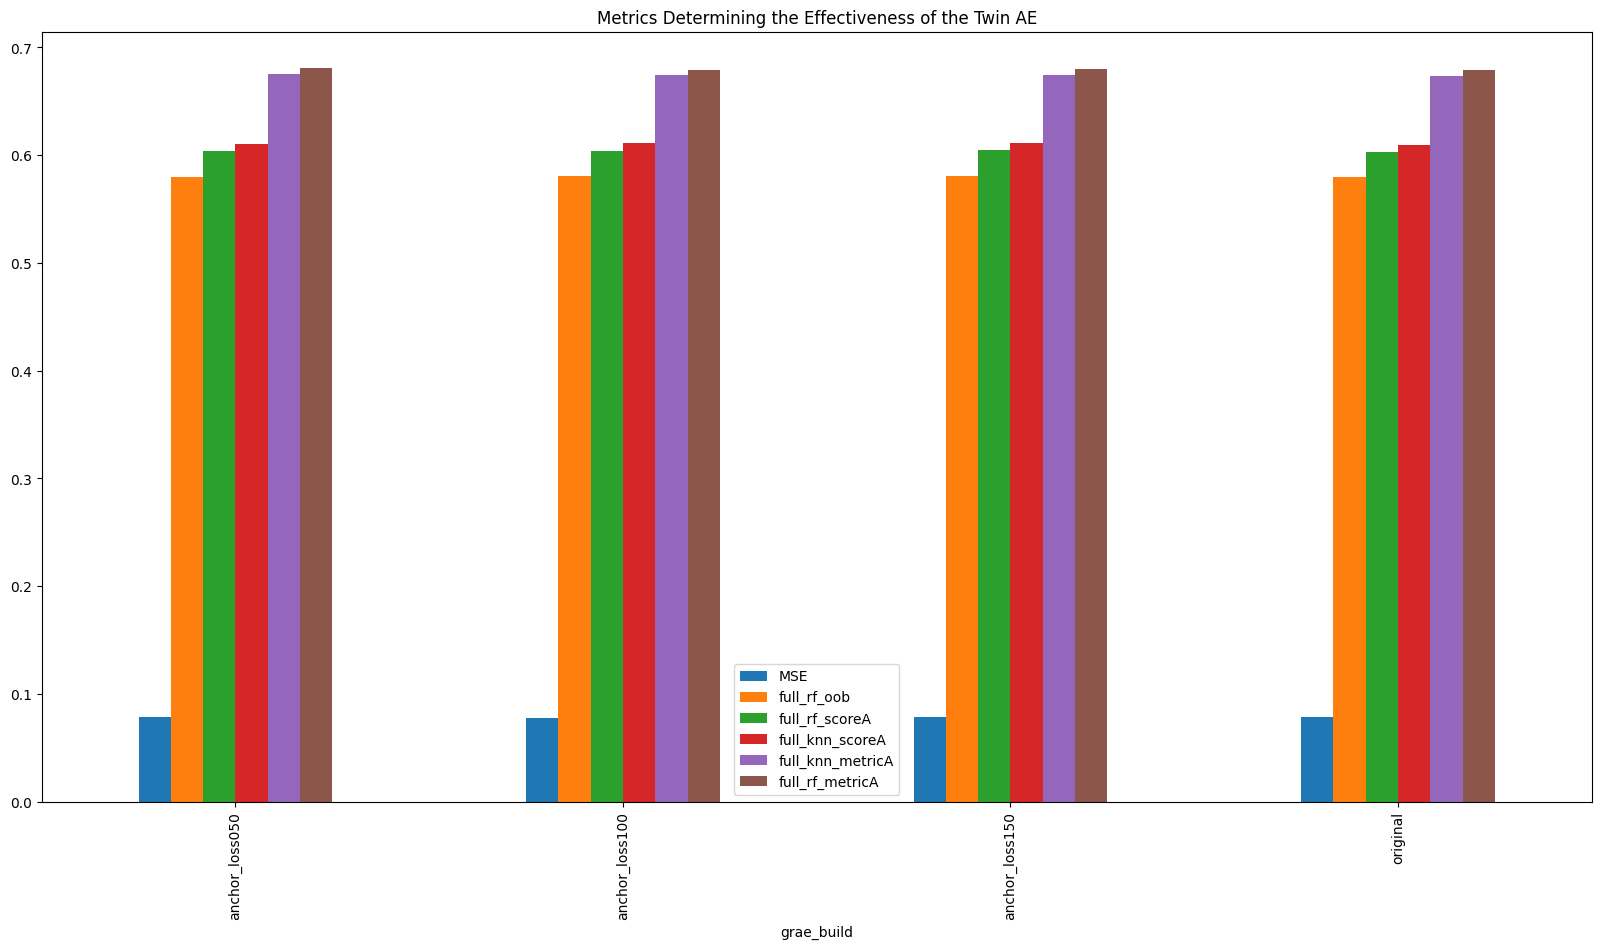

In [48]:
Col = grae_results.columns[4:][[0,1, 2,3,4,5,6]]
df = grae_results[Col].groupby("grae_build").mean().reset_index()
ordered_cols = ["grae_build"] + sorted(list(Col[1:]), key=lambda c: df[c].min())
df.plot(x="grae_build", y=ordered_cols[1:], kind="bar", title="Metrics Determining the Effectiveness of the Twin AE", figsize=(20,10))

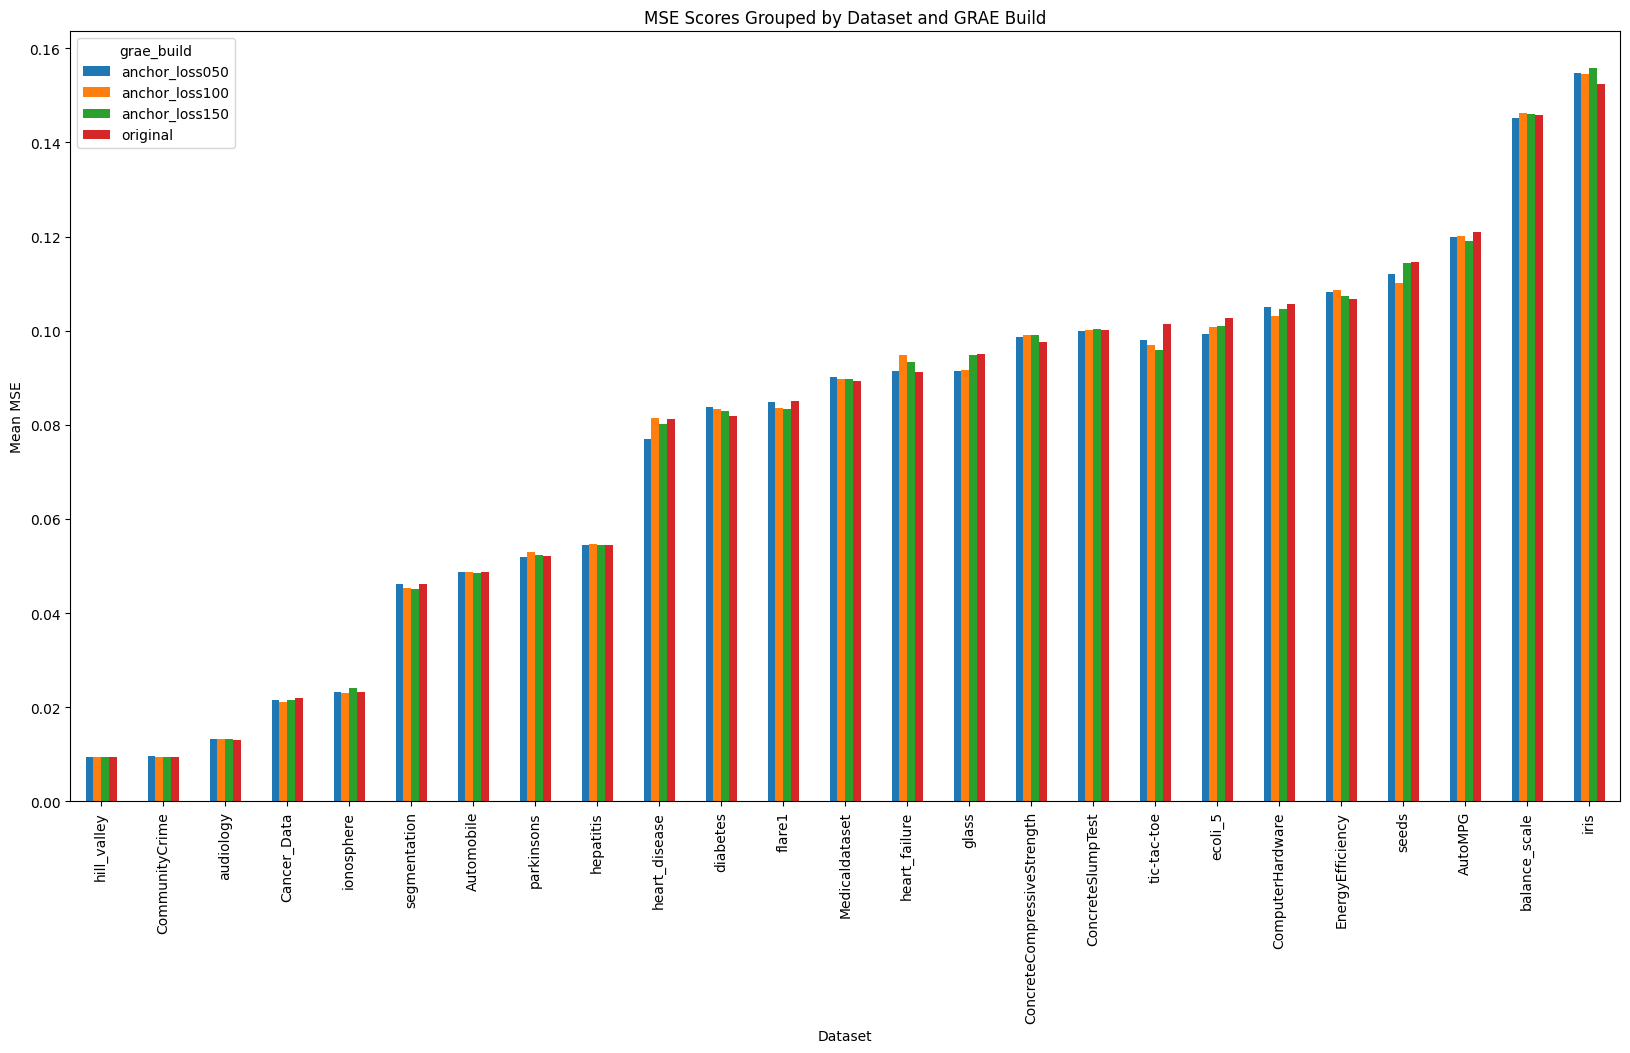

In [13]:
import matplotlib.pyplot as plt

# Group by dataset and grae_build, then calculate the mean MSE
grouped_df = grae_results.groupby(['dataset', 'grae_build'])['MSE'].mean().unstack()

# Sort the DataFrame by the mean MSE of the 'original' grae_build
grouped_df = grouped_df.sort_values(by='original')

# Plot the results
grouped_df.plot(kind='bar', figsize=(20, 10), title='MSE Scores Grouped by Dataset and GRAE Build')
plt.ylabel('Mean MSE')
plt.xlabel('Dataset')
plt.show()

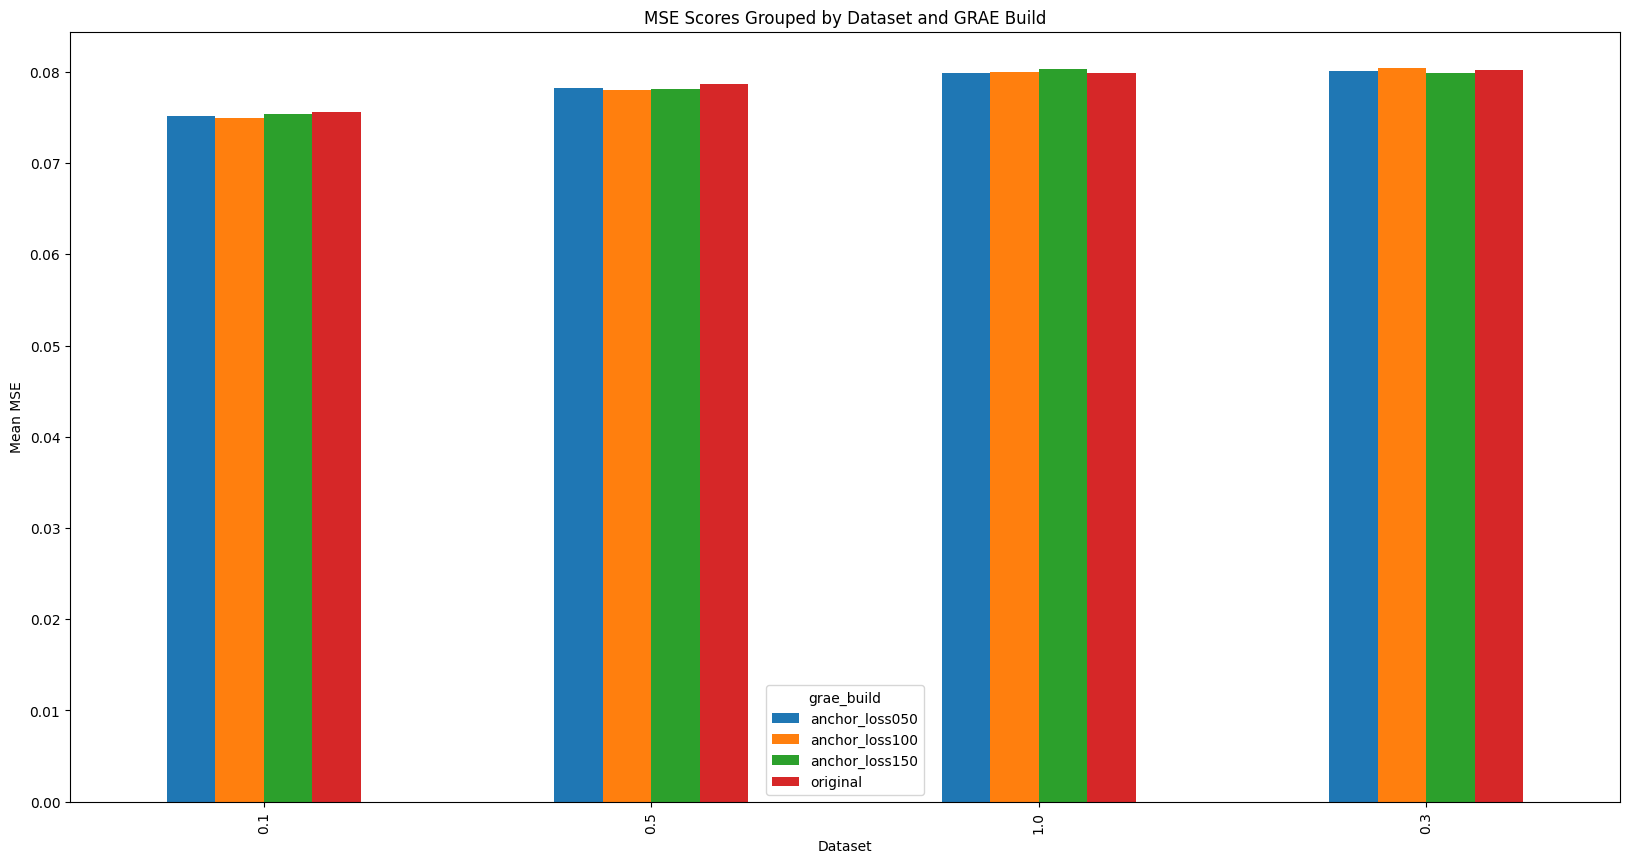

In [14]:
import matplotlib.pyplot as plt

# Group by dataset and grae_build, then calculate the mean MSE
grouped_df = grae_results.groupby(['Anchor_Percent', 'grae_build'])['MSE'].mean().unstack()

# Sort the DataFrame by the mean MSE of the 'original' grae_build
grouped_df = grouped_df.sort_values(by='original')

# Plot the results
grouped_df.plot(kind='bar', figsize=(20, 10), title='MSE Scores Grouped by Dataset and GRAE Build')
plt.ylabel('Mean MSE')
plt.xlabel('Dataset')
plt.show()

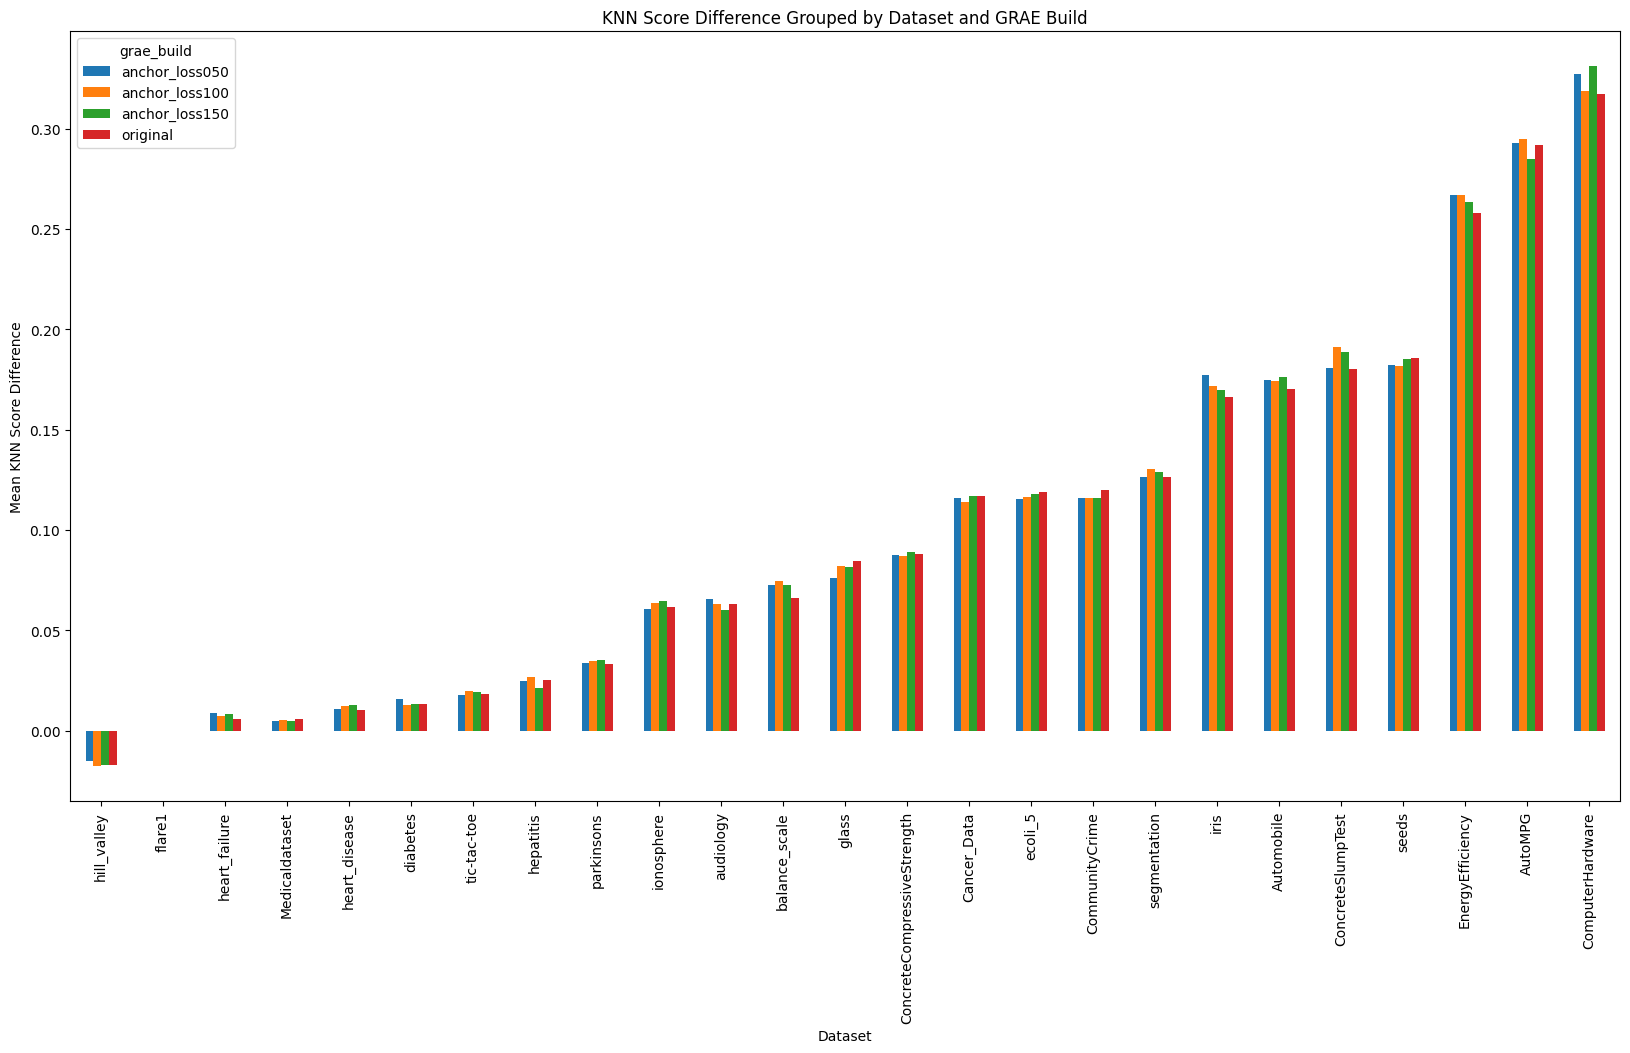

In [15]:
import matplotlib.pyplot as plt

# Calculate the difference between full_knn_scoreA and pred_knn_scoreA
grae_results['knn_score_diff'] = grae_results['full_knn_scoreA'] - grae_results['pred_knn_scoreA']

# Group by dataset and grae_build, then calculate the mean of the difference
grouped_df = grae_results.groupby(['dataset', 'grae_build'])['knn_score_diff'].mean().unstack()

# Sort the DataFrame by the mean difference of the 'original' grae_build
grouped_df = grouped_df.sort_values(by='original')

# Plot the results
grouped_df.plot(kind='bar', figsize=(20, 10), title='KNN Score Difference Grouped by Dataset and GRAE Build')
plt.ylabel('Mean KNN Score Difference')
plt.xlabel('Dataset')
plt.show()

## Alternate Methodologies
- MSE here represents how far the data translated to the other domain is off

In [16]:
alternate.sample(5)

,method,dataset,split,MSE,Anchor_Percent
2256,MASH,CommunityCrime,distort,1217.894519,0.5
2042,MAGAN,ionosphere,turn,0.102426,0.1
559,MASH,parkinsons,random,21.240733,0.1
1692,MASH,CommunityCrime,even,236.619743,1.0
757,DTA,glass,distort,0.546754,0.1


              MSE
method           
DTA      4.805846
MAGAN    0.129178
MASH    24.686687


<Axes: title={'center': 'MSE for Alternate GRAE'}, xlabel='method'>

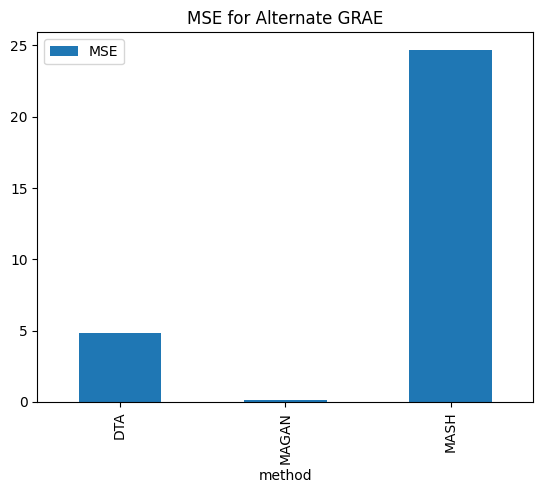

In [17]:
print(alternate.drop(columns = ["dataset", "split", "Anchor_Percent"]).groupby("method").mean())
alternate.drop(columns = ["dataset", "split", "Anchor_Percent"]).groupby("method").mean().plot(kind="bar", title="MSE for Alternate GRAE")

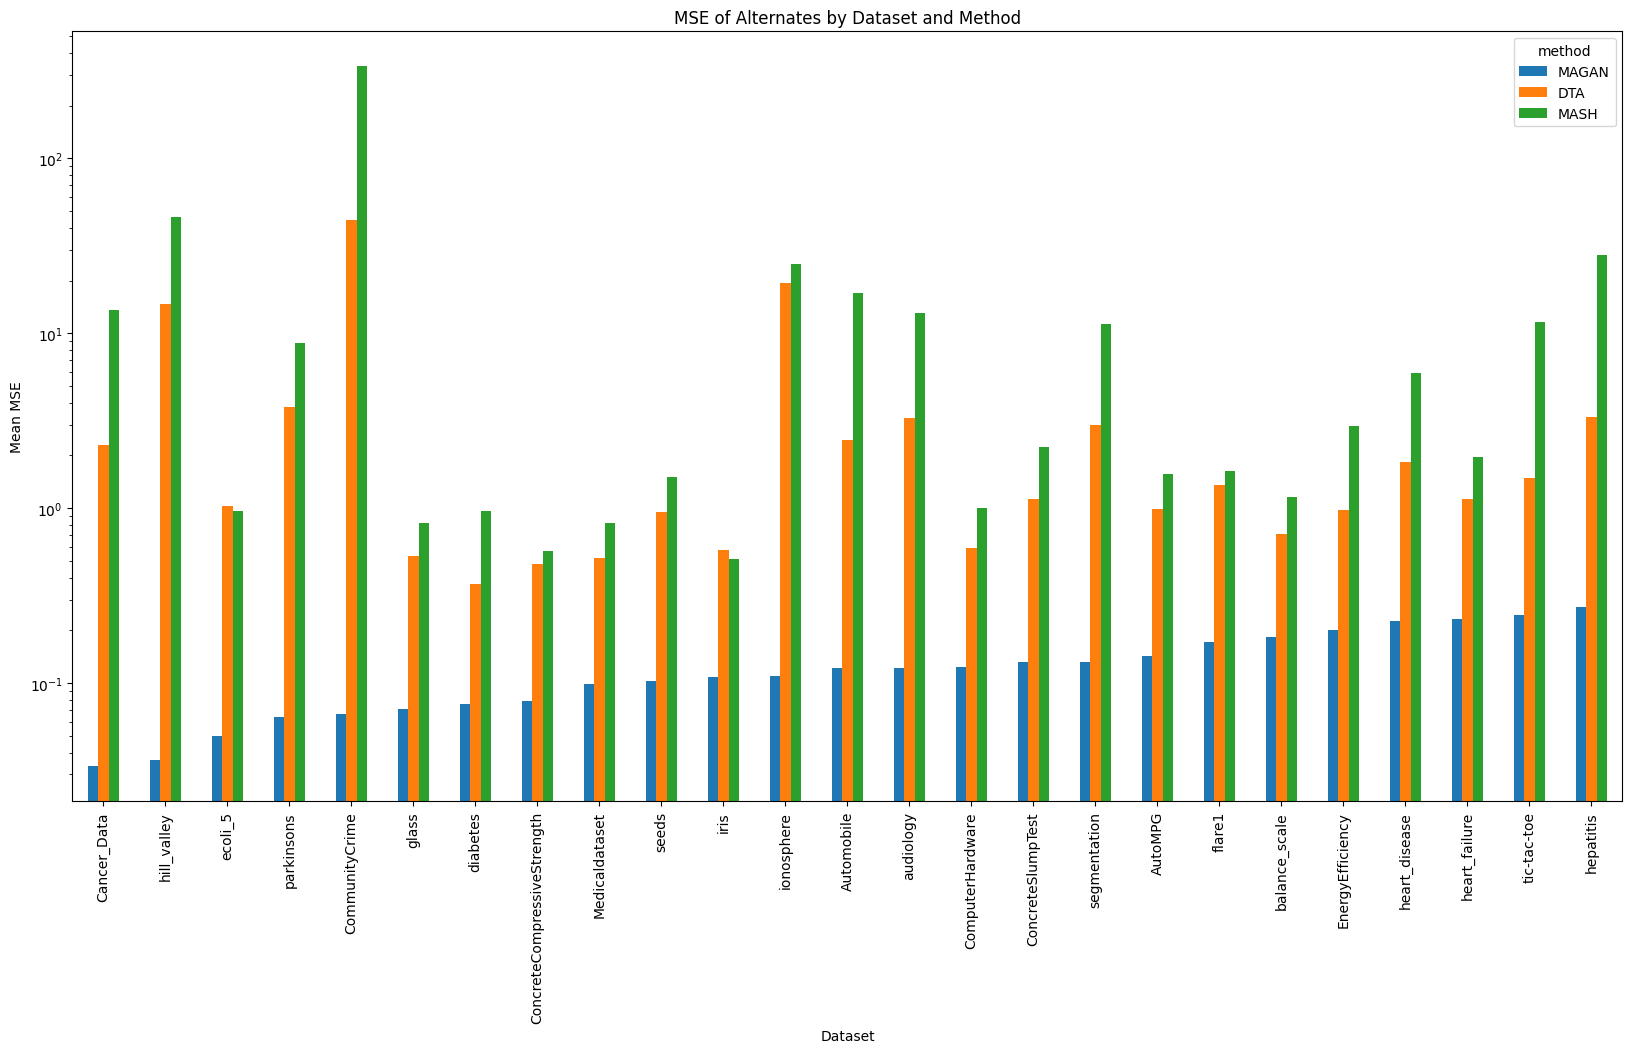

In [18]:
import matplotlib.pyplot as plt

# Group by dataset and method, then calculate the mean MSE
grouped_alternate = alternate.groupby(['dataset', 'method'])['MSE'].mean().unstack()

grouped_alternate = grouped_alternate.sort_values(by='MAGAN')

#Swap magan and dta column
grouped_alternate = grouped_alternate[["MAGAN", 'DTA', 'MASH']]

# Plot the results
grouped_alternate.plot(kind='bar',  logy=True, figsize=(20, 10), title='MSE of Alternates by Dataset and Method')
plt.ylabel('Mean MSE')
plt.xlabel('Dataset')
plt.show()

In [19]:
grouped_alternate

method,MAGAN,DTA,MASH
dataset,,,
Cancer_Data,0.033284,2.302769,13.663921
hill_valley,0.036313,14.652032,46.343769
ecoli_5,0.049965,1.027604,0.960371
parkinsons,0.063543,3.789989,8.750276
CommunityCrime,0.066189,44.530029,335.473084
glass,0.071234,0.529622,0.816978
diabetes,0.075699,0.367267,0.966647
ConcreteCompressiveStrength,0.078910,0.480484,0.565969
Medicaldataset,0.098936,0.516848,0.825991


## GRAE MSE to Truth
- MSE error from GRAE translation (A to B) compared to actual B

In [4]:
len(MSE_to_Data)

40381

In [5]:
MSE_to_Data["method"].unique()

array(['DTA', 'NAMA', 'MAPA', 'MASH-', 'SPUD', 'MAGAN', 'SSMA', 'MASH',
       'JLMA'], dtype=object)

In [6]:
MSE_to_Data.sample(5)

,method,dataset,split,lam,Anchor_Percent,MSE
30708,MASH,glass,even,100,0.1,0.030498
7344,NAMA,flare1,even,150,0.5,0.124953
30409,SPUD,Cancer_Data,distort,150,1.0,0.006760
10934,SPUD,ionosphere,even,0,0.5,0.067494
21155,MAPA,heart_disease,skewed,150,1.0,0.164388


<Axes: title={'center': "GRAE's ability to recreate data"}, xlabel='method'>

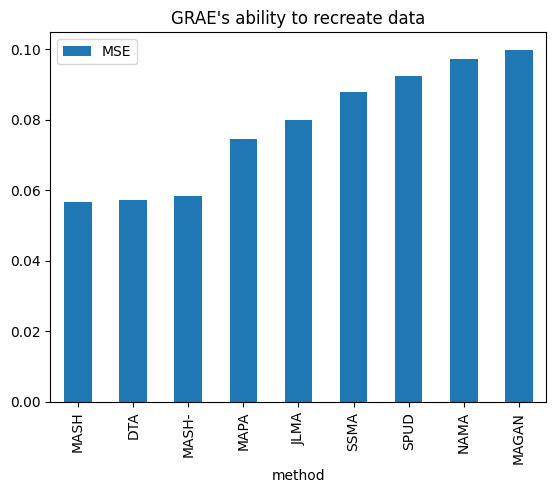

In [7]:
#Plot by Method
MSE_to_Data.drop(columns = ["split", "dataset", "Anchor_Percent", "lam"]).groupby("method").mean().sort_values(by = "MSE").plot(kind="bar", title="GRAE's ability to recreate data")

<Axes: title={'center': 'Loss to Recreate Data in the other Domain'}, xlabel='method', ylabel='Mean Squared Error'>

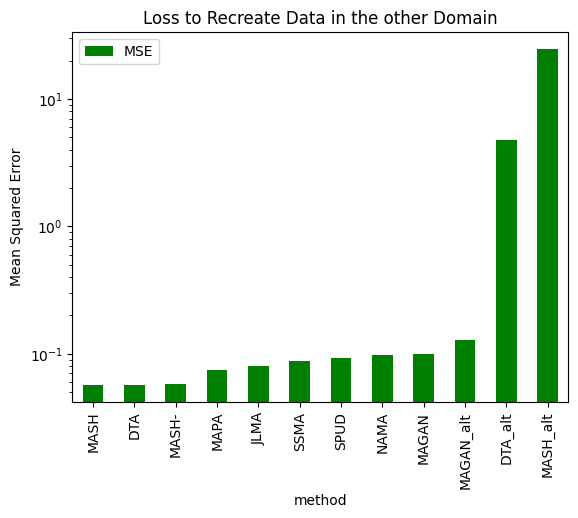

In [13]:
alt_methods = alternate.drop(columns = ["dataset", "split", "Anchor_Percent"]).groupby("method").mean()
alt_methods.index = alt_methods.index + "_alt"

grae_methods = MSE_to_Data.drop(columns = ["split", "dataset", "Anchor_Percent", "lam"]).groupby("method").mean()

methods = pd.concat([alt_methods, grae_methods]).sort_values(by = "MSE")
methods.plot(kind="bar", logy = True, color = "green", ylabel= "Mean Squared Error", title="Loss to Recreate Data in the other Domain")

<Axes: title={'center': 'Loss to Recreate Data in the other Domain'}, xlabel='method,lam'>

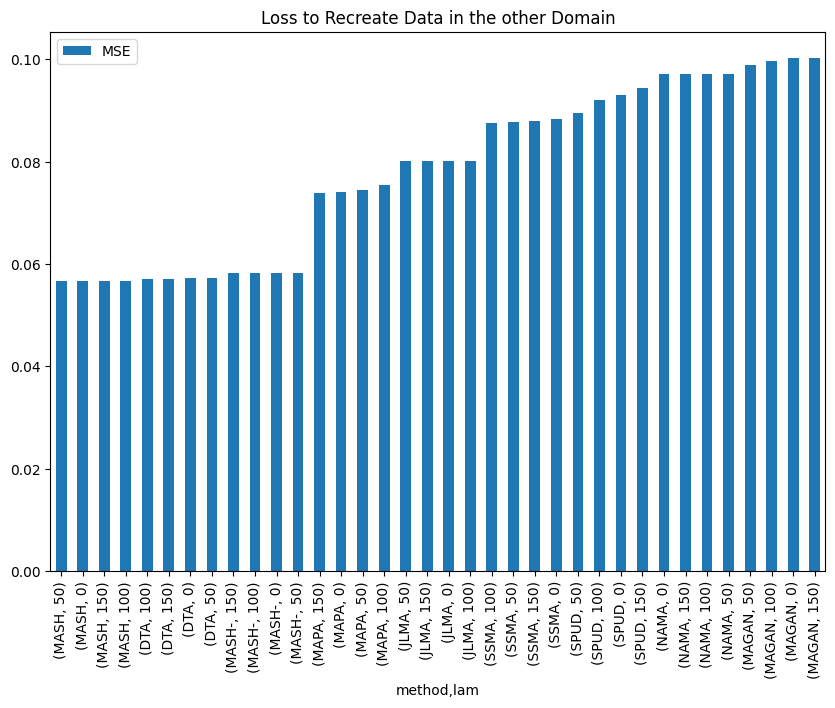

In [9]:
MSE_to_Data.drop(columns = ["split", "dataset", "Anchor_Percent"]).groupby(["method", "lam"]).mean().sort_values(by = "MSE").plot(kind="bar", figsize= (10, 7), title="Loss to Recreate Data in the other Domain")

<Axes: title={'center': 'Loss to Recreate Data in the other Domain'}, xlabel='lam'>

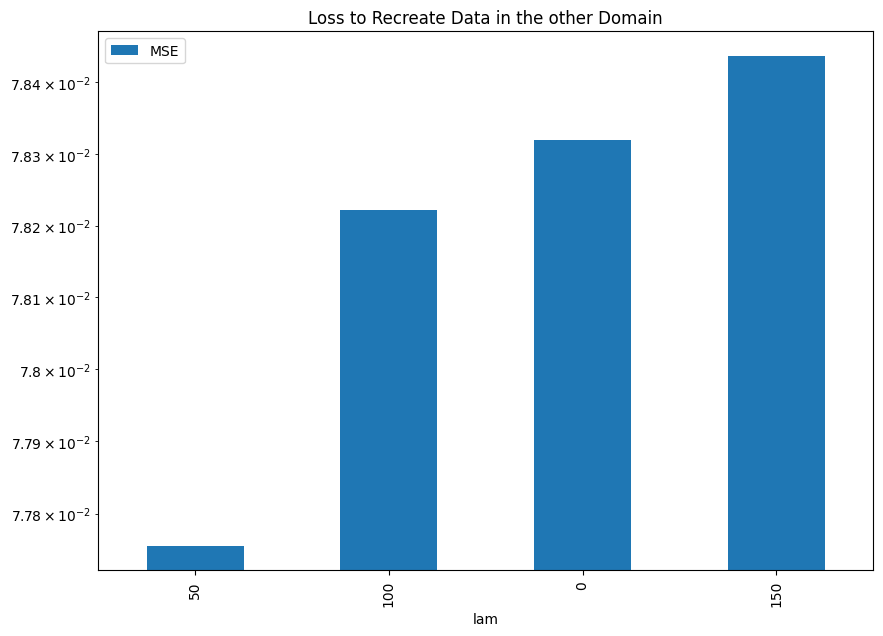

In [10]:
MSE_to_Data.drop(columns = ["split", "dataset", "Anchor_Percent", "method"]).groupby(["lam"]).mean().sort_values(by = "MSE").plot(kind="bar", logy = True, figsize= (10, 7), title="Loss to Recreate Data in the other Domain")

## 1. Show the difference between the poor domain (Score on just that domain) and the embedding score using GRAE for that domain 


In [3]:
import pandas as pd
METHOD = "MASH-"
MODEL = "knn"

if MODEL == "knn":
    SCORE = "Nearest Neighbor" 
else:
    SCORE = "Random Forest Emb"

pipeline_baseline = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/ManifoldData/PipelineBaselines.csv").drop(columns = ["Unnamed: 0"])
pipeline_baseline2 = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/ManifoldData/PipelineBasline.csv").drop(columns = ["Unnamed: 0"])
pipeline_baseline = pd.concat([pipeline_baseline, pipeline_baseline2], ignore_index=True)
print(f"Length of data frame {len(pipeline_baseline)}")
pipeline_baseline.sample(4)

Length of data frame 2200


,csv_file,Method,split,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),CE (4 KNN)
88,heart_disease.csv,Domain A Pipeline Baseline,distort,0.527426,0.600000,0.583333,0.541273,0.542639,NaN
1955,AirfoilSelfNoise.csv,Domain B Pipeline Baseline,turn,0.878204,0.872969,0.619041,0.608450,0.351350,0.782943
1012,ecoli_5.csv,Domain A Pipeline Baseline,even,0.762452,0.742424,0.772727,0.734004,0.734007,NaN
1249,parkinsons.csv,Domain B Pipeline Baseline,distort,0.858065,0.825000,0.850000,0.850000,0.822043,NaN


In [4]:
pipeline_baseline.columns

Index(['csv_file', 'Method', 'split', 'Random Forest OOB', 'Random Forest Emb',
       'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)',
       'Random Forest (F1 score or RMSE)', 'CE (4 KNN)'],
      dtype='object')

<Axes: title={'center': 'Pipeline Baseline - Nearest Neighbor by Method'}, xlabel='csv_file'>

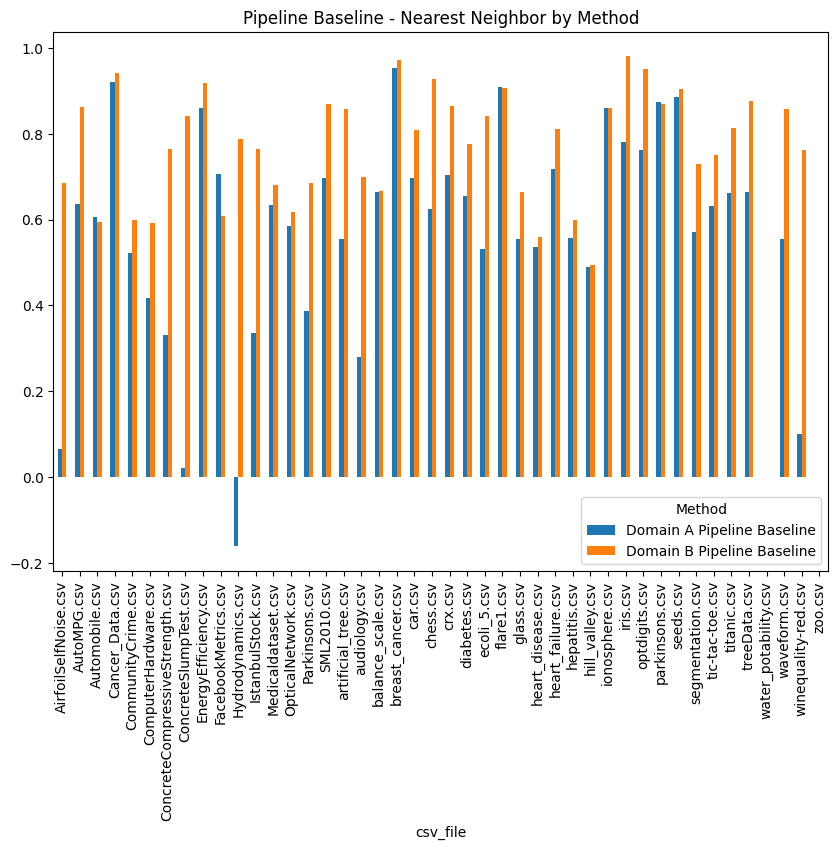

In [5]:
pipeline_baseline[pipeline_baseline["split"] == "skewed"].drop(columns=["split"]).groupby(
    by=["csv_file", "Method"])[SCORE].mean().unstack().plot(kind="bar", figsize=(10, 7), title="Pipeline Baseline - " + SCORE + " by Method")

In [6]:
# Compare this against our scores for these 
from Helpers.Visualization_helpers import subset_df
skewed_baselines = subset_df(pipeline_baseline, split = "skewed", Method = "Domain A Pipeline Baseline").drop(columns=["split", "Method"])
skewed_baselines["dataset"] = skewed_baselines["csv_file"].str.replace(".csv", "")

/yunity/arusty/Graph-Manifold-Alignment/Python_Files/Helpers/Visualization_helpers.py:11: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/All_Data_DataFrame.csv", keep_default_na=False, na_values=['', 'NaN'], index_col= None)


In [7]:
skewed_results = subset_df(grae_results, method = METHOD, split = "skewed")[["dataset", f"pred_{MODEL}_scoreA"]]

In [8]:
skewed_results

,dataset,pred_knn_scoreA
5,tic-tac-toe,0.671875
27,ConcreteSlumpTest,0.125127
68,flare1,0.892308
130,hepatitis,0.678571
147,balance_scale,0.632000
...,...,...
42826,ecoli_5,0.621212
42867,EnergyEfficiency,0.908574
42891,hill_valley,0.393443
42910,ConcreteCompressiveStrength,0.291118


In [9]:
skewed_baselines.columns

Index(['csv_file', 'Random Forest OOB', 'Random Forest Emb',
       'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)',
       'Random Forest (F1 score or RMSE)', 'CE (4 KNN)', 'dataset'],
      dtype='object')

In [10]:
# Group both by dataset
skewed_std = skewed_results.groupby(by=["dataset"]).std()
skewed_baselines = skewed_baselines[[SCORE, "dataset"]].groupby(by=["dataset"]).mean()#.unstack()

In [12]:
skewed_results = skewed_results.groupby(by=["dataset"]).mean()#.unstack()

In [13]:
# Ensure both DataFrames have the same index
common_index = skewed_baselines.index.intersection(skewed_results.index)

# Subtract skewed_results from skewed_baselines
difference = skewed_baselines.loc[common_index].values - skewed_results.loc[common_index].values

# Display the result
import numpy as np
print(sum(difference < 0 )), print(np.mean(difference)), print("\n", difference)

[10]
0.023104725333914916

 [[-3.27387295e-02]
 [ 8.93952850e-02]
 [ 3.72807018e-03]
 [ 6.28978878e-03]
 [-1.93840943e-01]
 [ 4.76288556e-02]
 [ 2.87974760e-01]
 [ 1.59572062e-01]
 [ 1.43939394e-02]
 [-6.97368421e-02]
 [ 3.42793651e-02]
 [ 1.85064935e-02]
 [-5.87121212e-02]
 [-1.39860140e-04]
 [ 6.09408034e-02]
 [-3.66666667e-02]
 [ 6.54166667e-02]
 [-3.21428571e-02]
 [ 6.10655738e-02]
 [ 2.03252850e-02]
 [-2.91666667e-02]
 [ 1.51282051e-01]
 [-2.50000000e-03]
 [ 3.85054868e-02]
 [-2.60416667e-02]]


(None, None, None)

In [18]:
# Create lists to store datasets where domain A is better than B and vice versa
domain_a_better = []
domain_b_better = []

# Iterate through the common index and compare the scores
for dataset in common_index:
    domain_a_score = pipeline_baseline[(pipeline_baseline['csv_file'] == f"{dataset}.csv") & (pipeline_baseline['Method'] == "Domain A Pipeline Baseline")][SCORE].values[0]
    domain_b_score = pipeline_baseline[(pipeline_baseline['csv_file'] == f"{dataset}.csv") & (pipeline_baseline['Method'] == "Domain B Pipeline Baseline")][SCORE].values[0]
    
    if domain_a_score > domain_b_score:
        domain_a_better.append(dataset)
    else:
        domain_b_better.append(dataset)

print("Datasets where Domain A is better than Domain B:", domain_a_better)
print("Datasets where Domain B is better than Domain A:", domain_b_better)

Datasets where Domain A is better than Domain B: ['AutoMPG', 'Automobile', 'ComputerHardware', 'ConcreteCompressiveStrength', 'EnergyEfficiency', 'Medicaldataset', 'balance_scale', 'diabetes', 'ecoli_5', 'heart_disease', 'heart_failure', 'hepatitis', 'ionosphere', 'iris', 'segmentation']
Datasets where Domain B is better than Domain A: ['Cancer_Data', 'CommunityCrime', 'ConcreteSlumpTest', 'audiology', 'flare1', 'glass', 'hill_valley', 'parkinsons', 'seeds', 'tic-tac-toe']


Good results
- MASH, rf / knn
- MASH-, rf / knn

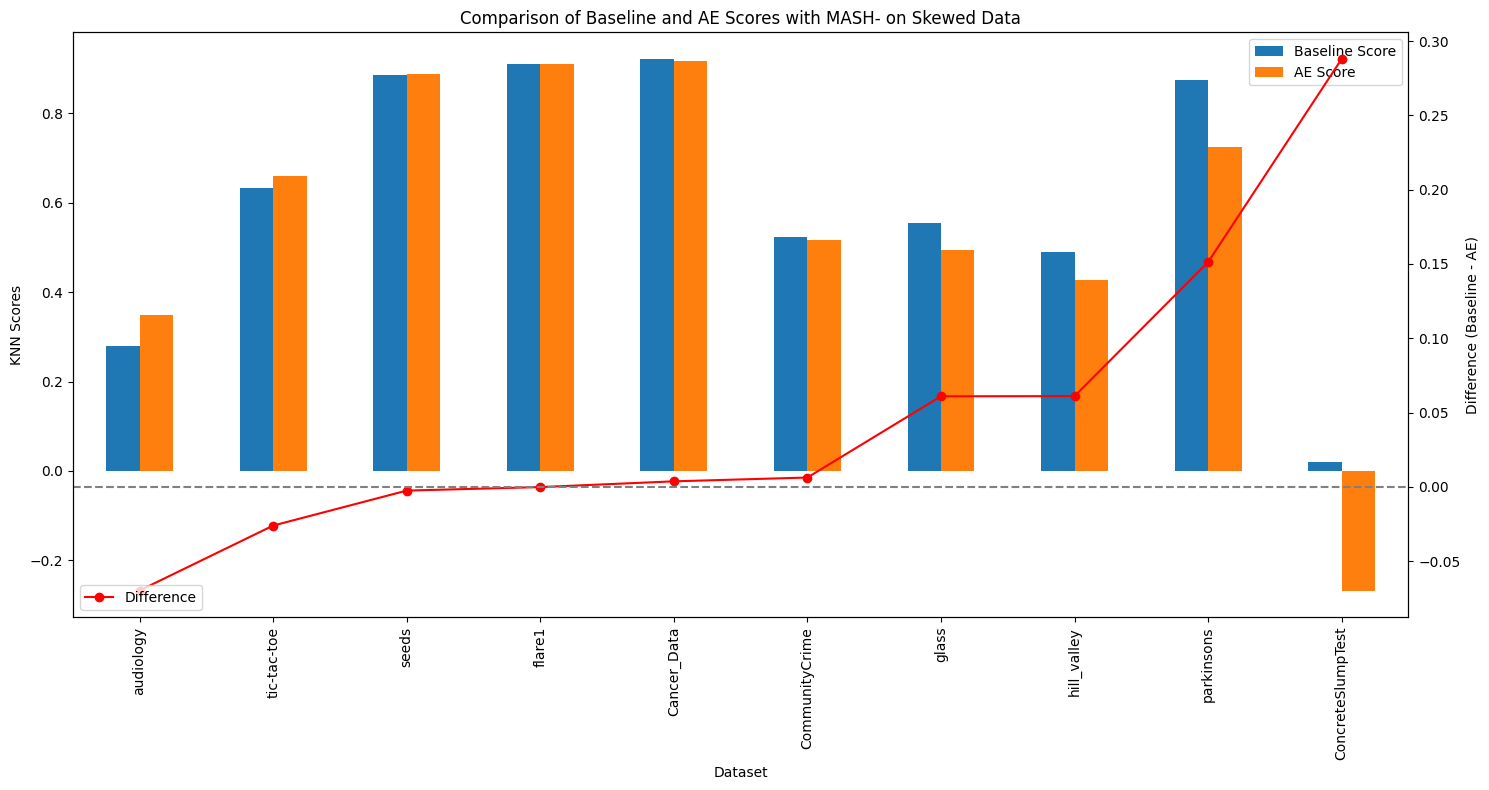

In [19]:
import matplotlib.pyplot as plt

# Ensure both DataFrames have the same index
common_index = skewed_baselines.index.intersection(skewed_results.index).intersection(set(domain_b_better))

# Subtract skewed_results from skewed_baselines
difference = skewed_baselines.loc[common_index].values - skewed_results.loc[common_index].values

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Dataset': common_index,
    'Baseline Score': skewed_baselines.loc[common_index].values.flatten(),
    'AE Score': skewed_results.loc[common_index].values.flatten(),
    'Difference': difference.flatten()
})

# Sort the DataFrame by the 'Difference' column
plot_df = plot_df.sort_values(by='Difference')

# Plot the results
fig, ax = plt.subplots(figsize=(15, 8))

# Plot Baseline and GRAE Scores
plot_df.plot(x='Dataset', y=['Baseline Score', 'AE Score'], kind='bar', ax=ax)
ax.set_title(f'Comparison of Baseline and AE Scores with {METHOD} on Skewed Data')
ax.set_ylabel(f'{MODEL.upper()} Scores')
ax.set_xlabel('Dataset')

# Plot the Difference as a line plot
ax2 = ax.twinx()
plot_df.plot(x='Dataset', y='Difference', kind='line', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Difference (Baseline - AE)')
ax2.axhline(0, color='gray', linestyle='--')
ax2.legend(loc='lower left')



plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

In [26]:
skewed_DTA.index.unique().sort_values()

Index(['AutoMPG', 'Automobile', 'Cancer_Data', 'CommunityCrime',
       'ComputerHardware', 'ConcreteCompressiveStrength', 'ConcreteSlumpTest',
       'EnergyEfficiency', 'Medicaldataset', 'audiology', 'balance_scale',
       'diabetes', 'ecoli_5', 'flare1', 'glass', 'heart_disease',
       'heart_failure', 'hepatitis', 'hill_valley', 'ionosphere', 'iris',
       'parkinsons', 'seeds', 'segmentation', 'tic-tac-toe'],
      dtype='object', name='dataset')

In [28]:
common_index

Index(['Cancer_Data', 'CommunityCrime', 'ConcreteSlumpTest', 'audiology',
       'flare1', 'glass', 'hill_valley', 'parkinsons', 'seeds', 'tic-tac-toe'],
      dtype='object', name='dataset')

In [43]:
plot_df

,Dataset,Baseline Score,AE Score,MASH,SPUD,MAGAN,JLMA,DTA
7,parkinsons,0.875000,0.723718,-0.105769,-0.080128,-0.054487,-0.080128,-0.028846
6,hill_valley,0.488525,0.427459,-0.013115,0.077049,0.044262,0.027869,0.052459
4,flare1,0.909091,0.909231,0.013986,0.013986,0.013986,0.013986,0.013986
5,glass,0.554545,0.493605,0.026850,0.026850,-0.019662,0.026850,-0.275476
0,Cancer_Data,0.921053,0.917325,0.035088,0.052632,0.052632,0.026316,-0.298246
1,CommunityCrime,0.522140,0.515850,0.035842,0.019441,-0.043385,0.053949,-0.592293
8,seeds,0.885000,0.887500,0.090000,0.065000,0.040000,0.015000,-0.510000
9,tic-tac-toe,0.632292,0.658333,0.096875,0.086458,0.091667,0.091667,0.091667
2,ConcreteSlumpTest,0.020837,-0.267138,0.151298,0.000094,0.177369,-0.088751,-0.023355
3,audiology,0.278947,0.348684,0.194737,0.194737,0.142105,0.194737,0.036842


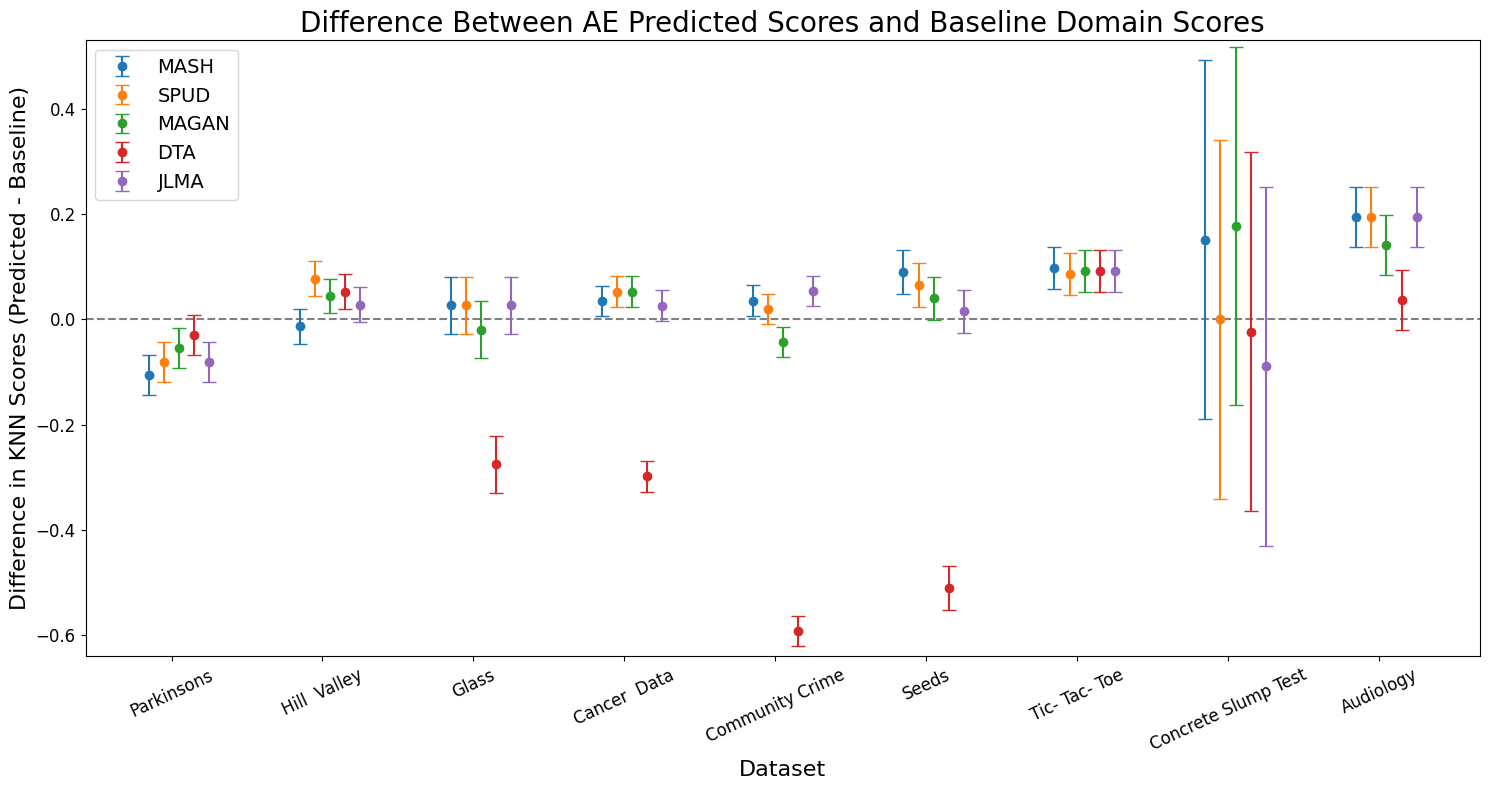

In [55]:
# Plot the differences
import matplotlib.pyplot as plt


# Ensure both DataFrames have the same index
common_index = skewed_baselines.index.intersection(skewed_results.index).intersection(set(domain_b_better))
common_index = common_index.delete(common_index.get_loc('flare1'))

# Subtract skewed_results from skewed_baselines for MASH
skewed_MASH = subset_df(grae_results, method="MASH", split="skewed")[["dataset", f"pred_{MODEL}_scoreA"]].groupby(by=["dataset"]).max()
mash_difference =  skewed_MASH.loc[common_index].values - skewed_baselines.loc[common_index].values


# Subtract skewed_results from skewed_baselines for SPUD
skewed_SPUD = subset_df(grae_results, method="SPUD", split="skewed")[["dataset", f"pred_{MODEL}_scoreA"]].groupby(by=["dataset"]).max()
spud_difference = skewed_SPUD.loc[common_index].values - skewed_baselines.loc[common_index].values


# Subtract skewed_results from skewed_baselines for MAGAN
skewed_MAGAN = subset_df(grae_results, method="MAGAN", split="skewed")[["dataset", f"pred_{MODEL}_scoreA"]].groupby(by=["dataset"]).max()
magan_difference =  skewed_MAGAN.loc[common_index].values - skewed_baselines.loc[common_index].values


# Subtract skewed_results from skewed_baselines for DTA
skewed_DTA = subset_df(grae_results, method="DTA", split="skewed")[["dataset", f"pred_{MODEL}_scoreA"]].groupby(by=["dataset"]).max()
dta_difference = skewed_DTA.loc[common_index].values - skewed_baselines.loc[common_index].values

# Subtract skewed_results from skewed_baselines for JLMA
skewed_JLMA = subset_df(grae_results, method="JLMA", split="skewed")[["dataset", f"pred_{MODEL}_scoreA"]].groupby(by=["dataset"]).max()
skewed_JLMA = skewed_JLMA._append(skewed_MASH.loc["audiology"])
jlma_difference = skewed_JLMA.loc[common_index].values - skewed_baselines.loc[common_index].values

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
   'Dataset': common_index,
   'Baseline Score': skewed_baselines.loc[common_index].values.flatten(),
   'AE Score': skewed_results.loc[common_index].values.flatten(),
   'MASH': mash_difference.flatten(),
   'SPUD': spud_difference.flatten(),
   'MAGAN': magan_difference.flatten(),
   "JLMA": jlma_difference.flatten(),
   'DTA': dta_difference.flatten()
})



# Sort the DataFrame by the 'Difference' column
plot_df = plot_df.sort_values(by='MASH')


# # Plot the results
# fig, ax = plt.subplots(figsize=(15, 8))


# # Plot Baseline and GRAE Scores
# plot_df.plot(x='Dataset', y=['Baseline Score', 'AE Score'], kind='bar', ax=ax)
# ax.set_title(f'Comparison of Baseline and AE Scores with {METHOD} on Skewed Data')
# ax.set_ylabel(f'{MODEL.upper()} Scores')
# ax.set_xlabel('Dataset')


# # Plot the Difference as a line plot
# ax2 = ax.twinx()
# plot_df.plot(x='Dataset', y='Difference', kind='line', color='red', marker='o', ax=ax2)
# ax2.set_ylabel('Difference (Baseline - AE)')
# ax2.legend(loc='lower left')


# Plot the differences with error bars
fig, ax = plt.subplots(figsize=(15, 8))


ax.axhline(0, color='gray', linestyle='--')


# Plot the differences for each method with staggered x placement and error bars
x = np.arange(len(plot_df['Dataset']))


ax.errorbar(x - 0.15, plot_df['MASH'], yerr=skewed_std.loc[plot_df['Dataset'].values].values.flatten(), fmt='o', label='MASH', capsize=5)
ax.errorbar(x - 0.05, plot_df['SPUD'], yerr=skewed_std.loc[plot_df['Dataset'].values].values.flatten(), fmt='o', label='SPUD', capsize=5)
ax.errorbar(x + 0.05, plot_df['MAGAN'], yerr=skewed_std.loc[plot_df['Dataset'].values].values.flatten(), fmt='o', label='MAGAN', capsize=5)
ax.errorbar(x + 0.15, plot_df['DTA'], yerr=skewed_std.loc[plot_df['Dataset'].values].values.flatten(), fmt='o', label='DTA', capsize=5)
ax.errorbar(x + 0.25, plot_df['JLMA'], yerr=skewed_std.loc[plot_df['Dataset'].values].values.flatten(), fmt='o', label='JLMA', capsize=5)


ax.set_xticks(x)
ax.set_xticklabels(plot_df['Dataset'])


ax.set_title(f'Difference Between AE Predicted Scores and Baseline Domain Scores', fontsize=20)
ax.set_ylabel(f'Difference in {MODEL.upper()} Scores (Predicted - Baseline)', fontsize = 16)
# Capitalize the beginning of each word, replace underscores with spaces, and add spaces in camel case
def format_label(label):
   if label.lower() == 'communitycrime':
       return "Community Crime"
   elif label.lower() == 'concreteslumptest':
       return "Concrete Slump Test"
   label = label.replace('_', ' ').title()
   return ''.join([' ' + char if char.isupper() else char for char in label]).strip()


ax.set_xticklabels([format_label(label) for label in plot_df['Dataset']])


ax.set_xlabel('Dataset', fontdict={'fontsize': 16})
ax.legend(fontsize = 14)

#Limit top of graph to be 0.4, and bottom to be -0.6
plt.ylim(-0.64, 0.53)
plt.yticks(fontsize=12)
plt.xticks(rotation=25, fontsize=12)
plt.tight_layout()
plt.show()

## Score Variations

In [17]:
grae_results.sample(3)

,method,dataset,split,lam,Anchor_Percent,grae_build,MSE,full_rf_oob,full_knn_scoreA,full_rf_scoreA,...,full_rf_metricB,pred_rf_oob,pred_knn_scoreA,pred_rf_scoreA,pred_knn_metricA,pred_rf_metricA,pred_knn_scoreB,pred_rf_scoreB,pred_knn_metricB,pred_rf_metricB
12275,MASH,ecoli_5,even,100,1.0,anchor_loss100,0.033089,0.727969,0.787879,0.696970,...,0.784343,0.710728,0.757576,0.757576,0.699469,0.700104,0.575758,0.560606,0.572016,0.553379
30948,MAPA,segmentation,distort,100,1.0,anchor_loss150,0.046549,0.130952,0.720930,0.651163,...,0.122304,0.217262,0.116279,0.093023,0.122064,0.096551,0.720930,0.465116,0.705816,0.459935
6495,JLMA,Medicaldataset,distort,100,0.5,anchor_loss150,0.034064,0.735545,0.651515,0.693182,...,0.643484,0.727488,0.655303,0.685606,0.631455,0.682894,0.651515,0.594697,0.628283,0.582082


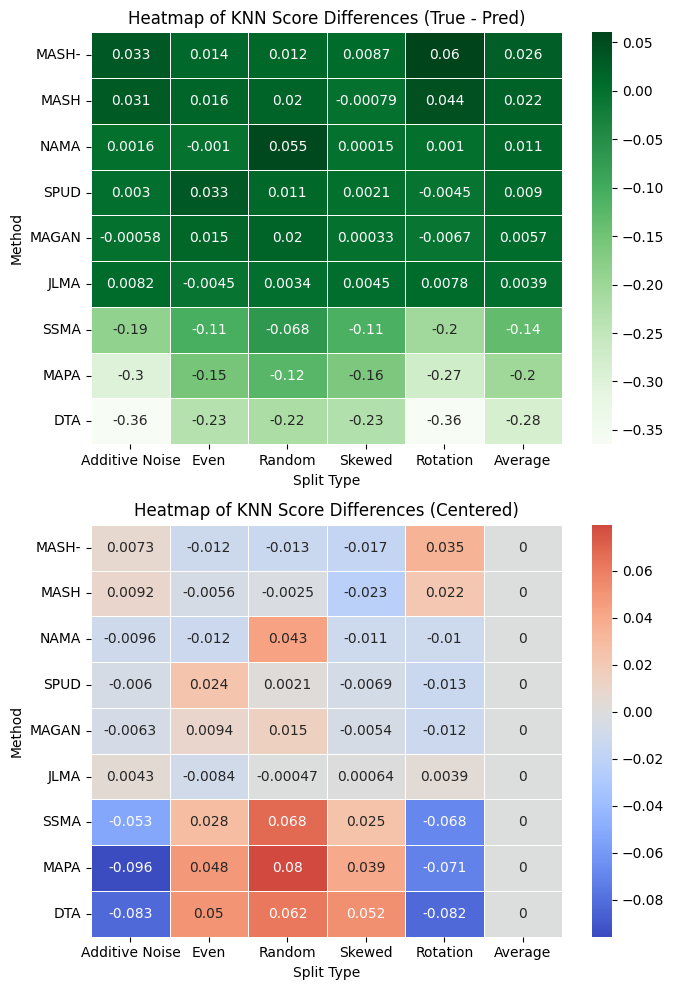

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the difference between full_knn_scoreB and pred_knn_scoreB
grae_results['knn_score_diff'] = grae_results['full_knn_scoreB'] - grae_results['pred_knn_scoreB']

# Group by method and split, then calculate the mean of the difference
averaged_scores = grae_results.groupby(['method', 'split'])['knn_score_diff'].mean().unstack()

# Filter out specific methods
filtered_methods = ['MALI-RF', 'RF-MASH', 'RF-MASH-', 'RF-NAMA', 'RF-SPUD']
averaged_scores = averaged_scores[~averaged_scores.index.isin(filtered_methods)]

# Add an average column and sort by it
averaged_scores['Average'] = averaged_scores.mean(axis=1)
averaged_scores.sort_values(by='Average', ascending=False, inplace=True)

# Create the heatmaps
fig, axs = plt.subplots(2, 1, figsize=(7, 10))

# Heatmap of knn_score_diff
sns.heatmap(averaged_scores, annot=True, cmap='Greens', linewidths=.5, ax=axs[0])
axs[0].set_title('Heatmap of KNN Score Differences (True - Pred)')
axs[0].set_xlabel('Split Type')
axs[0].set_xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], labels=["Additive Noise", "Even", "Random", "Skewed", "Rotation", "Average"], ha="center")
axs[0].set_ylabel('Method')
axs[0].tick_params(axis='y', rotation=0)

# Heatmap of the difference
difference_heatmap_scores = averaged_scores.subtract(averaged_scores['Average'], axis=0)
sns.heatmap(difference_heatmap_scores, annot=True, cmap='coolwarm', center=0, linewidths=.5, ax=axs[1])
axs[1].set_title('Heatmap of KNN Score Differences (Centered)')
axs[1].set_xlabel('Split Type')
axs[1].set_xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], labels=["Additive Noise", "Even", "Random", "Skewed", "Rotation", "Average"], ha="center")
axs[1].set_ylabel('Method')
axs[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()


In [19]:
grae_results.sample(4)

,method,dataset,split,lam,Anchor_Percent,grae_build,MSE,full_rf_oob,full_knn_scoreA,full_rf_scoreA,...,pred_rf_oob,pred_knn_scoreA,pred_rf_scoreA,pred_knn_metricA,pred_rf_metricA,pred_knn_scoreB,pred_rf_scoreB,pred_knn_metricB,pred_rf_metricB,knn_score_diff
36010,DTA,ecoli_5,distort,100,0.5,anchor_loss150,0.112116,0.415709,0.803030,0.712121,...,0.477011,0.257576,0.212121,0.254117,0.203353,0.818182,0.651515,0.811149,0.629693,-0.530303
18513,DTA,diabetes,even,100,0.1,anchor_loss050,0.196095,0.614821,0.629870,0.636364,...,0.590391,0.616883,0.571429,0.486821,0.525635,0.642857,0.623377,0.531260,0.568370,-0.012987
27312,SPUD,hepatitis,distort,100,0.1,anchor_loss100,0.013126,0.690909,0.678571,0.642857,...,0.740909,0.642857,0.642857,0.631398,0.631398,0.678571,0.714286,0.672219,0.695238,0.000000
20215,NAMA,heart_failure,skewed,100,1.0,original,0.052417,0.709205,0.633333,0.633333,...,0.682008,0.616667,0.616667,0.470447,0.590828,0.616667,0.700000,0.470447,0.658239,0.000000


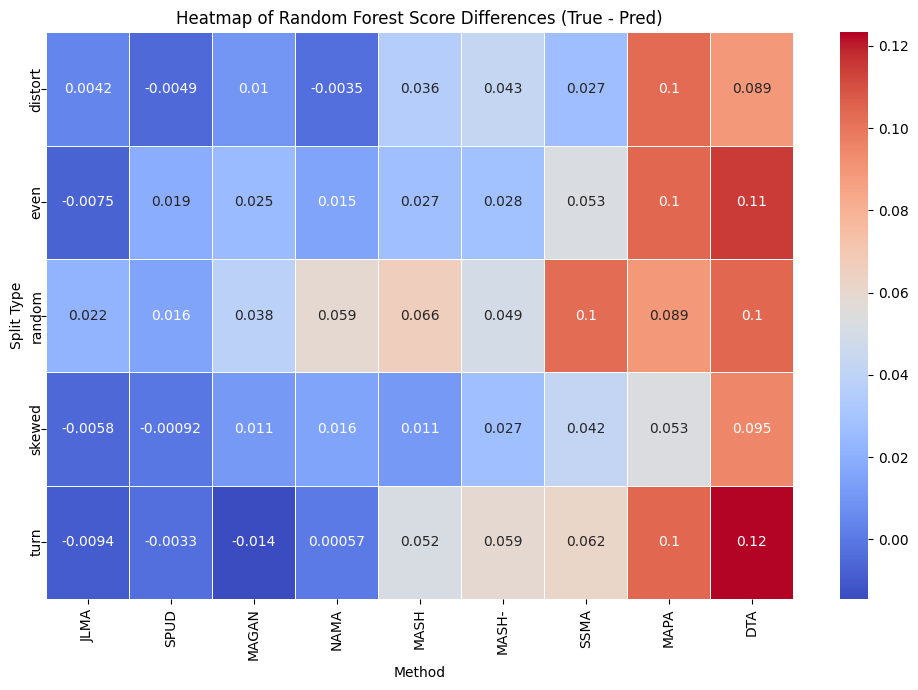

In [20]:
## Custom and Trial and Error Heatmap

score = "rf"

# Calculate the difference between full_knn_scoreB and pred_knn_scoreB
grae_results[f'{score}_score_diff'] = ((grae_results[f'full_{score}_scoreB'] - grae_results[f'pred_{score}_scoreB']) + (grae_results[f'full_{score}_scoreA'] - grae_results[f'pred_{score}_scoreA']))/2

# Group by method and split, then calculate the mean of the difference
averaged_scores = grae_results[grae_results["grae_build"] == "anchor_loss100"].groupby(['method', 'split'])[f'{score}_score_diff'].mean().unstack()

# Filter out specific methods
filtered_methods = ['MALI-RF', 'RF-MASH', 'RF-MASH-', 'RF-NAMA', 'RF-SPUD']
averaged_scores = averaged_scores[~averaged_scores.index.isin(filtered_methods)]

# Sort the methods by the average score difference
averaged_scores['Average'] = averaged_scores.mean(axis=1)
averaged_scores = averaged_scores.sort_values(by='Average')
averaged_scores = averaged_scores.drop(columns=['Average'])

# Create the heatmaps
fig, axs = plt.subplots(1, 1, figsize=(10, 7))

# Heatmap of rf_score_diff
sns.heatmap(averaged_scores.T, annot=True, cmap='coolwarm', linewidths=.5, ax=axs)
axs.set_title('Heatmap of Random Forest Score Differences (True - Pred)')
axs.set_ylabel('Split Type')
axs.set_yticks(ticks=[i + 0.5 for i in range(len(averaged_scores.columns))], labels=averaged_scores.columns, ha="center")
axs.set_xlabel('Method')
axs.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


# Testing Pipelines

## First pipeline

In [21]:
from Helpers.grae_pipeline_helpers import *

tasks = create_tasks_for_parrelization(extract_all_files())
tasks[0:3]

KeyboardInterrupt: 

In [ ]:
task_iris = next(task for task in tasks if task[4] == 0.1)
task_iris

('SPUD',
 'ComputerHardware',
 'random',
 {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
 0.1,
 'anchor_loss050',
 42)

In [ ]:
GRAE_tests(*tasks[15])

Results already exist for SPUD, ComputerHardware, random.


False

In [ ]:
#Get the embeddings
emb_pred, emb_full, labels = get_embeddings(*task_iris)

# Calculate MSE between embeddings
train_len = len(labels[0])
test_len = train_len + len(labels[1])
mse_emb_pred = np.vstack([emb_pred[train_len:test_len], emb_pred[test_len + train_len:]])
mse_emb_full = np.vstack([emb_full[train_len:test_len], emb_full[test_len + train_len:]])
mse = mean_squared_error(mse_emb_pred, mse_emb_full)

## Second Pipeline

In [ ]:
from Helpers.grae_pipeline_helpers import *

tasks = create_tasks_for_DTA_MAGAN_MASH(extract_all_files())
tasks[0:3]

[('MASH',
  'ComputerHardware',
  'turn',
  {'knn': 22,
   'page_rank': 'None',
   'DTM': 'log',
   'density_normalization': False,
   'connection_limit': 'auto',
   'threshold': 'auto',
   'epochs': 100},
  0.1,
  'alternate',
  42),
 ('MASH',
  'ComputerHardware',
  'turn',
  {'knn': 22,
   'page_rank': 'None',
   'DTM': 'log',
   'density_normalization': False,
   'connection_limit': 'auto',
   'threshold': 'auto',
   'epochs': 100},
  0.5,
  'alternate',
  42),
 ('MASH',
  'ComputerHardware',
  'turn',
  {'knn': 22,
   'page_rank': 'None',
   'DTM': 'log',
   'density_normalization': False,
   'connection_limit': 'auto',
   'threshold': 'auto',
   'epochs': 100},
  1,
  'alternate',
  42)]

In [ ]:
task_dta = next(task for task in tasks if task[0] == "MAGAN")
task_dta

('MAGAN',
 'ComputerHardware',
 'skewed',
 {'learning_rate': 0.005},
 0.1,
 'alternate',
 42)

In [ ]:
GRAE_tests(*task_dta)

Results already exist for MAGAN, ComputerHardware, skewed.


False

## Third Pipeline

In [ ]:
from Helpers.grae_pipeline_helpers import *

tasks = create_tasks_MSE(extract_all_files())
tasks[0:3]

[('SPUD',
  'ComputerHardware',
  'random',
  {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
  0.1,
  'just_MSE',
  42,
  0),
 ('SPUD',
  'ComputerHardware',
  'random',
  {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
  0.5,
  'just_MSE',
  42,
  0),
 ('SPUD',
  'ComputerHardware',
  'random',
  {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
  1,
  'just_MSE',
  42,
  0)]

In [ ]:
tasks = ('SPUD',
 'ComputerHardware',
 'distort',
 {'knn': 32, 'OD_method': 'mean', 'agg_method': 'log'},
 1,
 'just_MSE',
 42,
 50)

In [ ]:
from Helpers.grae_pipeline_helpers import *

GRAE_tests(*tasks)

2025-03-04 09:45:31.077801: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-04 09:45:31.120532: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-04 09:45:31.133429: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-04 09:45:31.160189: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-04 09:45:33.365942: W tensorflow/comp

Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Grae_Builds/SPUD_ComputerHardware_distort_graeBuild_just_MSE_lam_50_seed42_an1.json


True